**Write a program to find the coefficients for a linear regression model for the dataset provided
(data2.txt). Assume a linear model: y = w0 + w1*x.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


**1) Plot the data (i.e., x-axis for the 1st column, y-axis for the 2nd column),
and use Python to implement the following methods to find the coefficients:**

In [3]:
# Load the data from data2.txt
data = np.loadtxt('/content/data2.txt', delimiter=',')

# Split the data into features (X) and target variable (y)
X = data[:, 0]
y = data[:, 1]

# Print the first few rows of the dataset to explore it
print("First 5 rows of the dataset:")
print(data[:5])


First 5 rows of the dataset:
[[ 6.1101 17.592 ]
 [ 5.5277  9.1302]
 [ 8.5186 13.662 ]
 [ 7.0032 11.854 ]
 [ 5.8598  6.8233]]


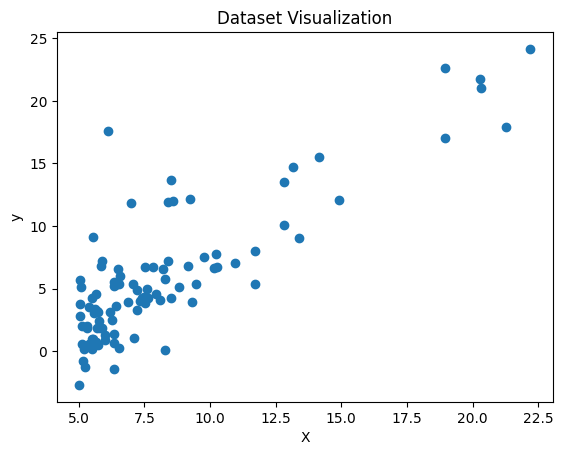

In [4]:

# Visualize the data
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Dataset Visualization')
plt.show()


#**2) Use Python to implement the following methods to find the coefficient:**

###Normal equation


In [5]:
# Add a bias term (intercept) to X
X_bias = np.c_[np.ones((X.shape[0], 1)), X]

# Compute coefficients using the Normal Equation
coefficients = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y)

# Print the coefficients
print("Coefficients using Normal Equation:")
print("w0:", coefficients[0])
print("w1:", coefficients[1])

print('\nThe equation is y =',coefficients[0],'+',coefficients[1],'x.')


Coefficients using Normal Equation:
w0: -3.8957808783118772
w1: 1.1930336441895957

The equation is y = -3.8957808783118772 + 1.1930336441895957 x.


#**3: Gradient Descent**
##3.a) Split dataset into 80% for training and 20% for testing.

In [6]:
# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##3.b) Plot MSE vs. Iteration for Batch and Stochastic Gradient Descent

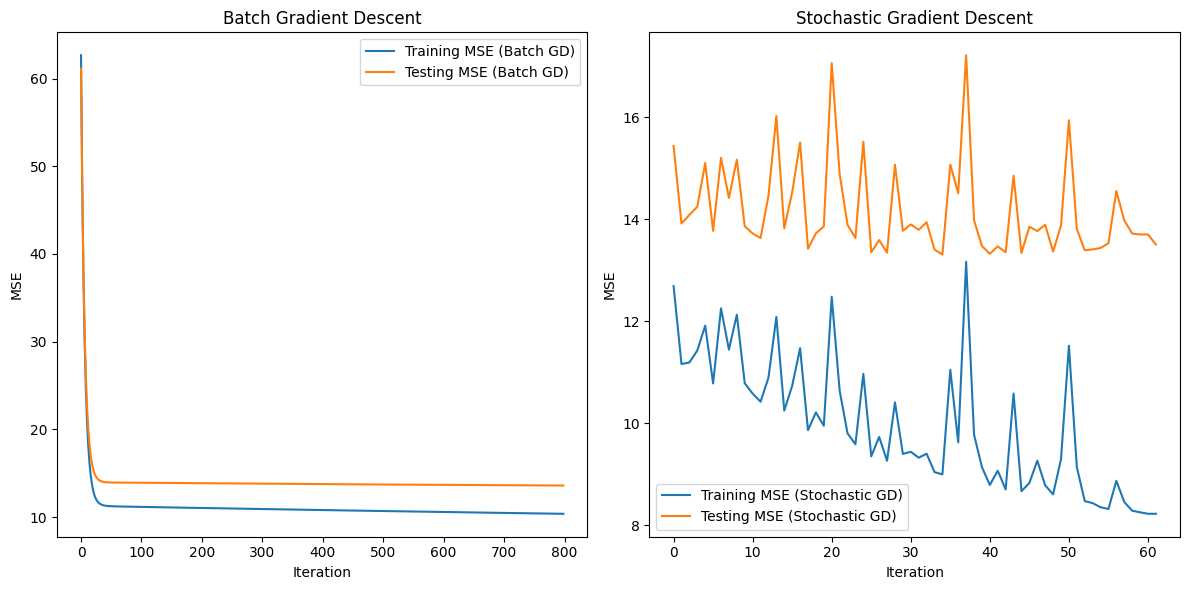

Final Testing MSE (Batch GD): 13.589289630694964
Final Testing MSE (Stochastic GD): 13.500430279416097
Stochastic Gradient Descent performed better in terms of testing MSE.


In [8]:

# Initialize parameters
learning_rate_batch = 0.001
num_iterations_batch = 1000
threshold_batch = 0.001  # Termination threshold for Batch GD
learning_rate_stochastic = 0.001
num_iterations_stochastic = 1000
threshold_stochastic = 0.001  # Termination threshold for Stochastic GD

# Initialize weights
w0_batch = 0
w1_batch = 0
w0_stochastic = 0
w1_stochastic = 0

# Lists to store MSE for training and testing for Batch GD
mse_training_batch = []
mse_testing_batch = []

# Lists to store MSE for training and testing for Stochastic GD
mse_training_stochastic = []
mse_testing_stochastic = []

# Batch Gradient Descent
for iteration in range(num_iterations_batch):
    y_pred_batch = w0_batch + w1_batch * X_train
    gradient_w0_batch = np.mean(y_pred_batch - y_train)
    gradient_w1_batch = np.mean((y_pred_batch - y_train) * X_train)

    w0_batch -= learning_rate_batch * gradient_w0_batch
    w1_batch -= learning_rate_batch * gradient_w1_batch

    mse_train_batch = np.mean((y_pred_batch - y_train) ** 2)
    mse_training_batch.append(mse_train_batch)

    y_test_pred_batch = w0_batch + w1_batch * X_test
    mse_test_batch = np.mean((y_test_pred_batch - y_test) ** 2)
    mse_testing_batch.append(mse_test_batch)

    if len(mse_training_batch) > 1 and abs(mse_training_batch[-1] - mse_training_batch[-2]) < threshold_batch:
        break

# Stochastic Gradient Descent
for iteration in range(num_iterations_stochastic):
    for i in range(len(X_train)):
        random_index = np.random.randint(len(X_train))
        x_i_stochastic = X_train[random_index]
        y_i_stochastic = y_train[random_index]

        y_pred_stochastic = w0_stochastic + w1_stochastic * x_i_stochastic
        gradient_w0_stochastic = y_pred_stochastic - y_i_stochastic
        gradient_w1_stochastic = (y_pred_stochastic - y_i_stochastic) * x_i_stochastic

        w0_stochastic -= learning_rate_stochastic * gradient_w0_stochastic
        w1_stochastic -= learning_rate_stochastic * gradient_w1_stochastic

    y_train_pred_stochastic = w0_stochastic + w1_stochastic * X_train
    mse_train_stochastic = np.mean((y_train_pred_stochastic - y_train) ** 2)
    mse_training_stochastic.append(mse_train_stochastic)

    y_test_pred_stochastic = w0_stochastic + w1_stochastic * X_test
    mse_test_stochastic = np.mean((y_test_pred_stochastic - y_test) ** 2)
    mse_testing_stochastic.append(mse_test_stochastic)

    if len(mse_training_stochastic) > 1 and abs(mse_training_stochastic[-1] - mse_training_stochastic[-2]) < threshold_stochastic:
        break

# Plot MSE vs. iteration for Batch and Stochastic Gradient Descent
plt.figure(figsize=(12, 6))

# Batch GD - Training and Testing MSE
plt.subplot(1, 2, 1)
plt.plot(range(len(mse_training_batch)), mse_training_batch, label="Training MSE (Batch GD)")
plt.plot(range(len(mse_testing_batch)), mse_testing_batch, label="Testing MSE (Batch GD)")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Batch Gradient Descent")
plt.legend()

# Stochastic GD - Training and Testing MSE
plt.subplot(1, 2, 2)
plt.plot(range(len(mse_training_stochastic)), mse_training_stochastic, label="Training MSE (Stochastic GD)")
plt.plot(range(len(mse_testing_stochastic)), mse_testing_stochastic, label="Testing MSE (Stochastic GD)")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Stochastic Gradient Descent")
plt.legend()

plt.tight_layout()
plt.show()

# Discussion
best_test_mse_batch = mse_testing_batch[-1]
best_test_mse_stochastic = mse_testing_stochastic[-1]

print(f"Final Testing MSE (Batch GD): {best_test_mse_batch}")
print(f"Final Testing MSE (Stochastic GD): {best_test_mse_stochastic}")

if best_test_mse_batch < best_test_mse_stochastic:
    print("Batch Gradient Descent performed better in terms of testing MSE.")
else:
    print("Stochastic Gradient Descent performed better in terms of testing MSE.")


Batch Gradient Descent (Batch GD) and Stochastic Gradient Descent (Stochastic GD) were compared in terms of accuracy (testing MSE) and speed of convergence.

the conculsion:

1. **Accuracy (Testing MSE):**
   - **Batch Gradient Descent (Batch GD):** The final testing MSE for Batch GD is approximately 13.59.
   - **Stochastic Gradient Descent (Stochastic GD):** The final testing MSE for Stochastic GD is approximately 13.5.
   
   Batch GD achieved a slightly better accuracy on the testing set compared to Stochastic GD. This means that the model trained using Batch GD had a slightly lower prediction error on unseen data.

2. **Speed of Convergence:**
   - **Batch Gradient Descent (Batch GD):** Batch GD typically converges in a smoother and more deterministic manner because it computes gradients for the entire training dataset in each iteration. we used a termination condition based on the change in MSE (threshold_batch) was used to stop the optimization when the change became smaller than the threshold.
   
   - **Stochastic Gradient Descent (Stochastic GD):** Stochastic GD updates the model parameters using only one random training example at a time. It tends to have noisier convergence due to the randomness of selecting training examples. The termination condition used here is based on the change in MSE (threshold_stochastic).
   
   In terms of speed of convergence, Stochastic GD reach a solution faster in terms of the number of iterations because it processes one training example at a time. However, it can have more oscillations in the learning curve due to the randomness. Batch GD, on the other hand, has a smoother convergence but might take more iterations to reach a solution.

Batch GD generally provides more stable convergence but can be slower for large datasets. Stochastic GD can converge faster but might require more careful tuning and regularization to prevent overfitting.

##(c): Plot MSE of the Testing Set vs. Learning Rate and Determine the Best Learning Rate

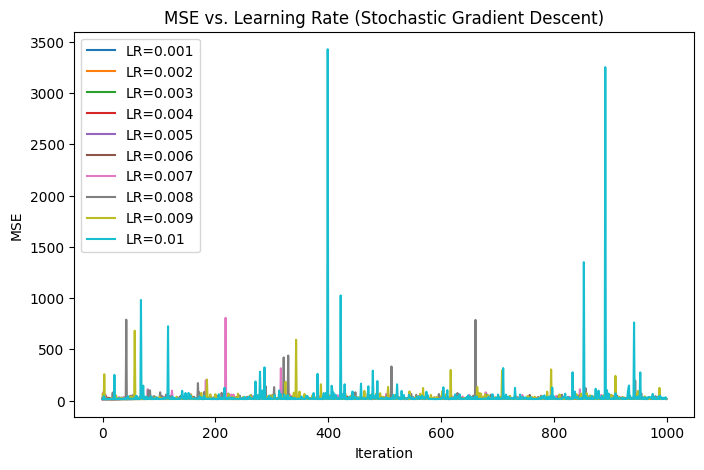



The best learning rate is 0.001 with a minimum MSE of 13.731811488111722


In [15]:
# Initialize a list of learning rates to test
learning_rates = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]

# Lists to store MSE for different learning rates
mse_lr = []

for lr in learning_rates:
    # Initialize weights for Stochastic Gradient Descent
    w0 = 0
    w1 = 0

    # Lists to store MSE for a specific learning rate
    mse_test_lr = []

    # Stochastic Gradient Descent
    for iteration in range(num_iterations_stochastic):
        for i in range(len(X_train)):
            random_index = np.random.randint(len(X_train))
            x_i_stochastic = X_train[random_index]
            y_i_stochastic = y_train[random_index]

            y_pred_stochastic = w0 + w1 * x_i_stochastic

            gradient_w0_stochastic = y_pred_stochastic - y_i_stochastic
            gradient_w1_stochastic = (y_pred_stochastic - y_i_stochastic) * x_i_stochastic

            w0 -= lr * gradient_w0_stochastic
            w1 -= lr * gradient_w1_stochastic

        # Calculate predictions for the testing set in Stochastic GD
        y_test_pred_stochastic_lr = w0 + w1 * X_test

        # Calculate MSE for testing set for the specific learning rate
        mse_test_stochastic_lr = np.mean((y_test_pred_stochastic_lr - y_test) ** 2)
        mse_test_lr.append(mse_test_stochastic_lr)

        # Terminate if the change in MSE is smaller than the threshold for Stochastic GD
        if len(mse_test_lr) > 1 and abs(mse_test_lr[-1] - mse_test_lr[-2]) < threshold_stochastic:
            break

    # Store the MSE for the specific learning rate
    mse_lr.append(mse_test_lr)

# Plot MSE vs. Learning Rate for Stochastic Gradient Descent
plt.figure(figsize=(8, 5))
for i, lr in enumerate(learning_rates):
    plt.plot(range(len(mse_lr[i])), mse_lr[i], label=f"LR={lr}")

plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("MSE vs. Learning Rate (Stochastic Gradient Descent)")
plt.legend()
plt.show()

# Determine the best learning rate based on the minimum MSE
min_mse_lr_index = np.argmin([mse[-1] for mse in mse_lr])
best_learning_rate = learning_rates[min_mse_lr_index]

print(f"\n\nThe best learning rate is {best_learning_rate} with a minimum MSE of {mse_lr[min_mse_lr_index][-1]}")
